# Assignment 8: Bayesian Optimization
## A8.1 Taking the human out of the loop

In [2]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed
import matplotlib
import math
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### 1. Define the function and bounds

In [101]:
def myf(x):
    return ((-3*x-7)**3) * math.cos(5*x-4) + 2*(x**2)

In [15]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)}]

In [16]:
max_iter = 5

### 2. Optimization

In [172]:
myProblem = GPyOpt.methods.BayesianOptimization(
    f=myf, domain=bounds,        # Function and domain                 
    acquisition_type='EI',       # Expected improvement
    exact_feval=True,            # Noiseless function evaluations
    eps=1e-6,
    normalize_Y=False,           # (for clearer visualization)
    initial_design_numdata=2)

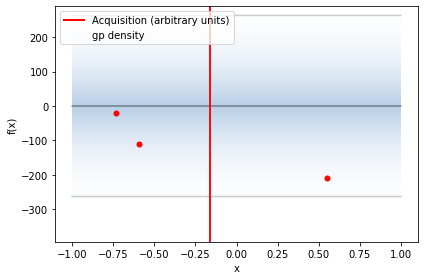

In [173]:
myProblem.run_optimization(max_iter=1)
myProblem.plot_acquisition()

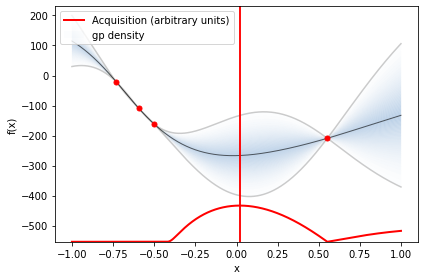

In [174]:
myProblem.run_optimization(max_iter=1)
myProblem.plot_acquisition()

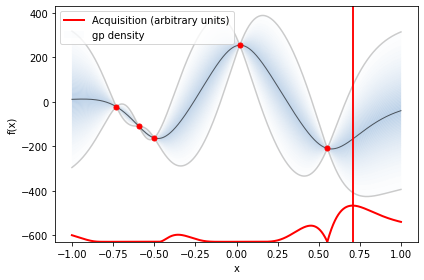

In [175]:
myProblem.run_optimization(max_iter=1)
myProblem.plot_acquisition()

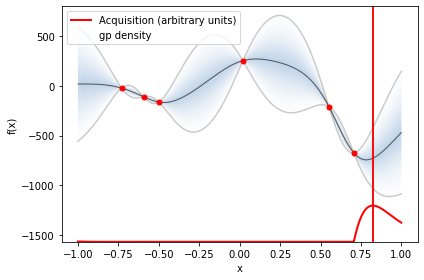

In [176]:
myProblem.run_optimization(max_iter=1)
myProblem.plot_acquisition()

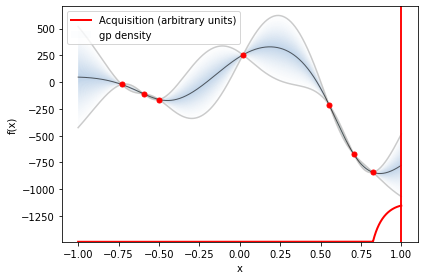

In [177]:
myProblem.run_optimization(max_iter=1)
myProblem.plot_acquisition()

In [178]:
myProblem.x_opt

array([0.82360352])

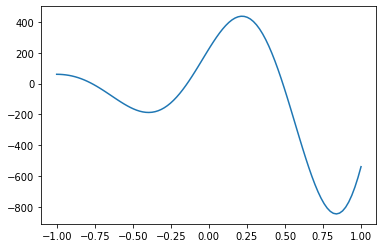

In [180]:
x = np.linspace(-1, 1, 100)
y = []
for i in x:
    y.append(myf(i))
plt.plot(x, y)

### 3. Noisy

#### 1) s = 0.01

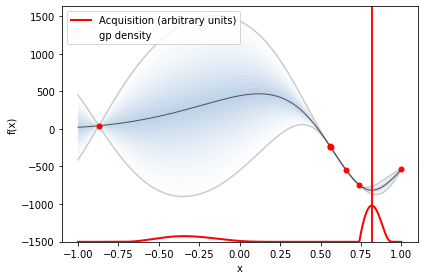

[0.73945757]


In [184]:
s = 0.01
def myf_noisy(x):
    return ((-3*x-7)**3)*math.cos(5*x-4)+2*(x**2) + s * np.random.randn()

myProblemWithNoise = GPyOpt.methods.BayesianOptimization(
    f=myf_noisy, domain=bounds,        # Function and domain                 
    acquisition_type='EI',       # Expected improvement
    exact_feval=False,            # Noiseless function evaluations
    eps=1e-6,
    normalize_Y=False,           # (for clearer visualization)
    initial_design_numdata=2)

myProblemWithNoise.run_optimization(max_iter=5)
myProblemWithNoise.plot_acquisition()
print(myProblemWithNoise.x_opt)

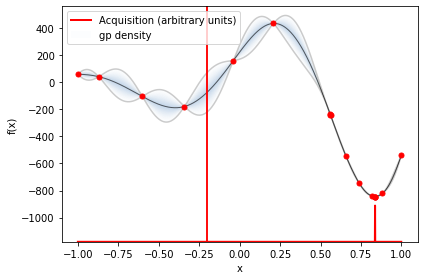

[0.83639262]


In [185]:
myProblemWithNoise.run_optimization(max_iter=10)
myProblemWithNoise.plot_acquisition()
print(myProblemWithNoise.x_opt)

#### 2) s = 0.1

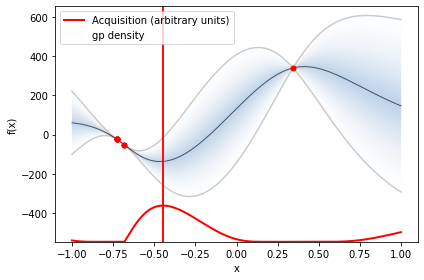

[-0.68112288]


In [194]:
s = 0.1
def myf_noisy(x):
    return ((-3*x-7)**3)*math.cos(5*x-4)+2*(x**2) + s * np.random.randn()
myProblemWithNoise = GPyOpt.methods.BayesianOptimization(
    f=myf_noisy, domain=bounds,        # Function and domain                 
    acquisition_type='EI',       # Expected improvement
    exact_feval=False,            # Noiseless function evaluations
    eps=1e-6,
    normalize_Y=False,           # (for clearer visualization)
    initial_design_numdata=2)

myProblemWithNoise.run_optimization(max_iter=5)
myProblemWithNoise.plot_acquisition()
print(myProblemWithNoise.x_opt)

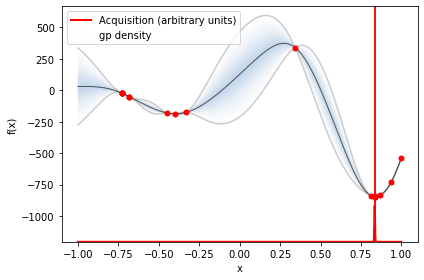

[0.83506483]


In [195]:
myProblemWithNoise.run_optimization(max_iter=10)
myProblemWithNoise.plot_acquisition()
print(myProblemWithNoise.x_opt)

#### 3) s = 0.5

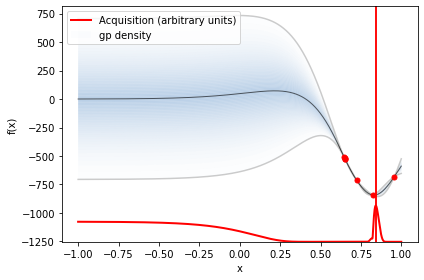

[0.82207289]


In [192]:
s = 0.5
def myf_noisy(x):
    return ((-3*x-7)**3)*math.cos(5*x-4)+2*(x**2) + s * np.random.randn()
myProblemWithNoise = GPyOpt.methods.BayesianOptimization(
    f=myf_noisy, domain=bounds,        # Function and domain                 
    acquisition_type='EI',       # Expected improvement
    exact_feval=False,       
    eps=1e-6,
    normalize_Y=False,           # (for clearer visualization)
    initial_design_numdata=2)

myProblemWithNoise.run_optimization(max_iter=5)
myProblemWithNoise.plot_acquisition()
print(myProblemWithNoise.x_opt)

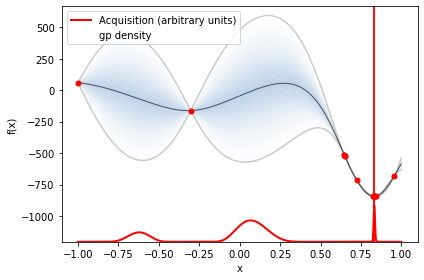

[0.83234784]


In [193]:
myProblemWithNoise.run_optimization(max_iter=10)
myProblemWithNoise.plot_acquisition()
print(myProblemWithNoise.x_opt)

### 4. Discussion

From the experiment, I think the behaviour of the optimization is good. In each iteration adds an observation and the model convergents after re-estimates. Next time, a new observation near current optimization will be added continually.  I drew the actual plot of the function, and compared with the surrogate function, the curve is roughly similar. And the estimated best x is similar to the real value. Thus it seem to work well for the function.  
With the noise, I tested 0.01, 0.1, 0.5 for the standard deviation of the noise. After 5 iterations, we can see that the curve shape changed. When s = 0.01, we could see the curve trend is similar to the real curve, but for s = 0.1, 0.5, the result is far away from the real curve. So the noise will influence the optimization. However, if I make more iterations, although there is noise, the result is close to the true value and every best x is around 0.83.  
Note: Sometimes I just got a horizontal straight line after 5 iterations, but most times I could get curves. I think the first two values are very important, because they will influence where to observe next value. If I got the value near the first lowest point (left, but not the global optimization), it's a little hard to extend the exploration scope.

Improvement: I think to improve the optimization, the increasing count of iterations is needed. In addition, when navigating the exploration-exploitation tradoff, maybe we could try to explore in a large area in the begining, so that we could find the possible optimal value in a few iterations.

### A8.2: Putting the human back in the loop
#### 1.Eliciting color preferences

[[0.15968722 0.1970084  0.6111321 ]]


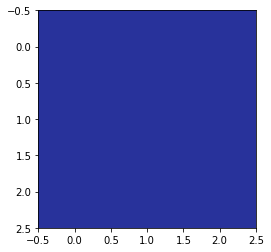

Grade? (0 to 5) 2
[[0.55691231 0.67047945 0.41638488]]


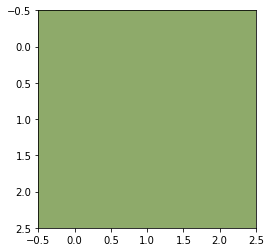

Grade? (0 to 5) 2
[[0.96354222 0.13989085 0.43132094]]


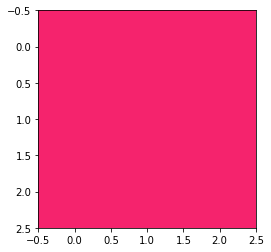

Grade? (0 to 5) 1
[[0.47966206 0.69974462 0.42864623]]


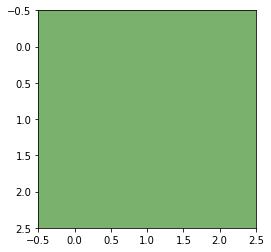

Grade? (0 to 5) 2
[[0.18890388 0.44360096 0.55210998]]


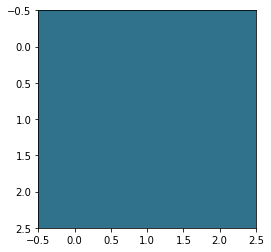

Grade? (0 to 5) 3
[[0.19242371 0.46813494 0.54609145]]


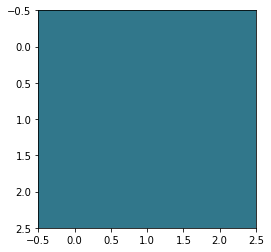

Grade? (0 to 5) 3
[[0.19381144 0.44865895 0.52067248]]


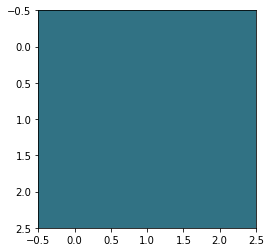

Grade? (0 to 5) 3
[[0.22021068 0.45001667 0.54304134]]


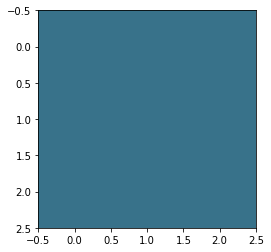

Grade? (0 to 5) 3
[0.38840179 0.06217331 0.62906958]


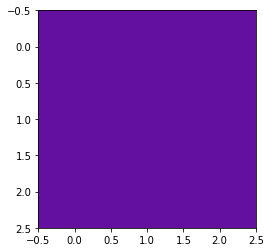

Grade? (0 to 5) 2
[0.43871365 0.33641369 0.02100193]


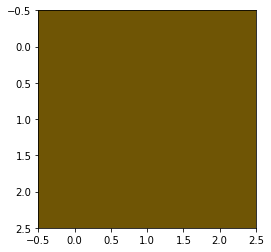

Grade? (0 to 5) 2
[0.26637047 0.11275758 0.39876573]


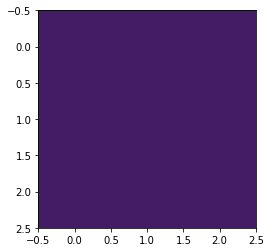

Grade? (0 to 5) 2
[0.67992386 0.65519742 0.20548912]


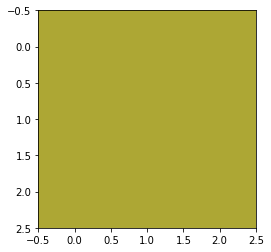

Grade? (0 to 5) 2
[0.6743561  0.03280507 0.02812201]


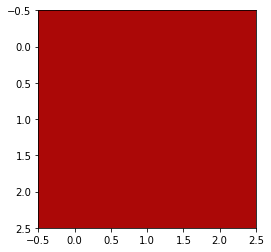

Grade? (0 to 5) 1
[0.94634278 0.32465656 0.37465443]


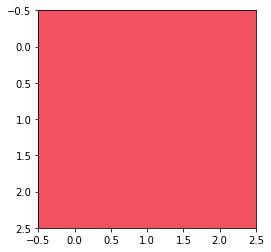

Grade? (0 to 5) 1
[0.83150468 0.77719735 0.99515882]


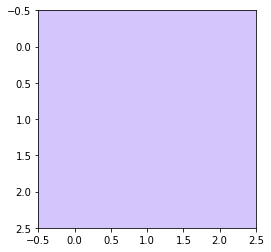

Grade? (0 to 5) 1
[0.91932313 0.93687    0.10258322]


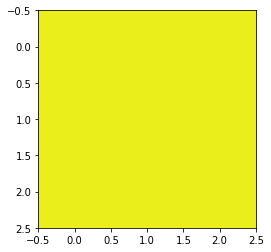

Grade? (0 to 5) 1


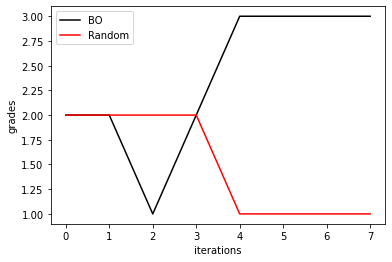

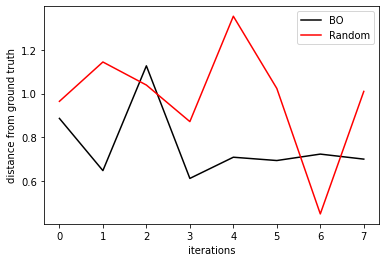

In [9]:
def f_u(x):
    plt.figure(1)
    print(x)
    im = x.reshape(1, 1, 3).repeat(3, axis=0).repeat(3, axis=1)
    plt.imshow(im)
    plt.show(block=False)
    while True:
        res = input('Grade? (0 to 5) ')
        if res in ['0', '1', '2', '3', '4', '5']:
            res = int(res)
            plt.close(1)
            return res


def run_bo(max_iter):
    bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0, 1)},
              {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)},
              {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)}]
    myBopt = GPyOpt.methods.BayesianOptimization(
        f=f_u, domain=bounds,
        acquisition_type='MPI',
        exact_feval=False,
        eps=1e-6,
        normalize_Y=False,
        initial_design_numdata=2,
        maximize=True)
    myBopt.run_optimization(max_iter=max_iter - 2)
    myBopt.plot_acquisition()

    return myBopt


def run_random(max_iter):
    xs = np.zeros((max_iter, 3))
    ys = np.zeros((max_iter,))

    for i in range(max_iter):
        xs[i, :] = np.random.rand(3)

        ys[i] = f_u(xs[i, :])

    return xs, ys


if __name__ == "__main__":
    n_iter = 8
    # run BO
    bo = run_bo(n_iter)
    # run random for comparison
    ra = run_random(n_iter)

    bo_xs, bo_ys = bo.get_evaluations()
    ra_xs, ra_ys = ra

    # one can investigate these to see how good colors were found and compare
    # to a ground truth color

    plt.plot(-bo_ys, 'k-', label='BO')
    plt.plot(ra_ys, 'r-', label='Random')
    plt.xlabel('iterations')
    plt.ylabel('grades')
    plt.legend()
    plt.show()

    # let's say ground truth color was red
    x_gt = np.array([0.42, 0.96, 0.98])

    plt.plot(np.sqrt(np.sum((bo_xs - x_gt)**2, 1)), 'k-', label='BO')
    plt.plot(np.sqrt(np.sum((ra_xs - x_gt)**2, 1)), 'r-', label='Random')
    plt.xlabel('iterations')
    plt.ylabel('distance from ground truth')
    plt.legend()
    plt.show()


#### 2. Report
From the first figure (grades vs iterations), the grade of BO method fluctuates firstly and then keeps at 3 which is the highest grade during the experienment. The grade of Random method keeps at 2 and decreases to 1.  
The second figure (distance from ground truth vs iterations), for BO method, the distance fluctuates in the first four iterations and then decreases to a stable level. For Random method, the distance fluctuates all the time, although the lowest distance is closer than using BO method, the highest distance is also higher than BO method and it seems that there is no trend to stabilize.

As a result, the BO method performs better. Because the prediction is approaching the actual value gradually, if there are enough iterations, it is very likely that the true value will be predicted. But we can't see any signs that the result is approaching. 

#### 3 Improvement
2) change the acquisition function from MPI -> EI

[[0.25898409 0.58784147 0.24545279]]


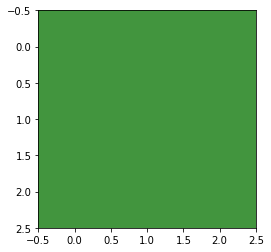

Grade? (0 to 5) 1
[[0.66066567 0.21035064 0.63557856]]


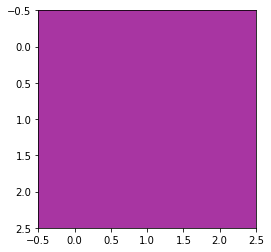

Grade? (0 to 5) 1
[[0.9044568  0.55403771 0.08017277]]


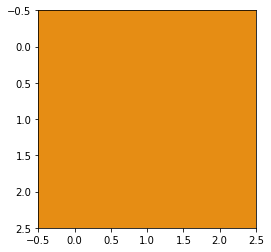

Grade? (0 to 5) 1
[[0.67854512 0.57955476 0.9581417 ]]


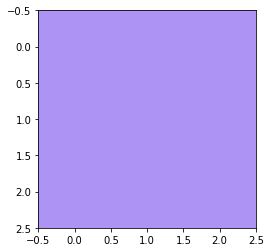

Grade? (0 to 5) 2
[[1. 1. 1.]]


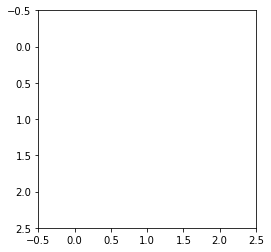

Grade? (0 to 5) 1
[[0.01958032 0.70517954 0.98160328]]


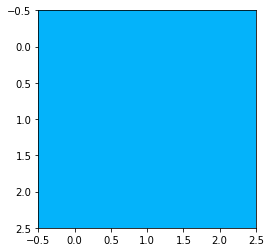

Grade? (0 to 5) 3
[[0. 1. 1.]]


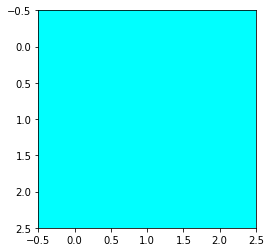

Grade? (0 to 5) 4
[[0. 1. 1.]]


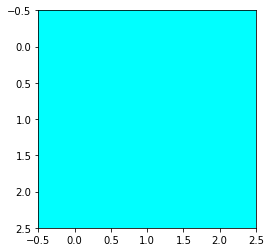

Grade? (0 to 5) 4
[0.40150557 0.6154269  0.12537099]


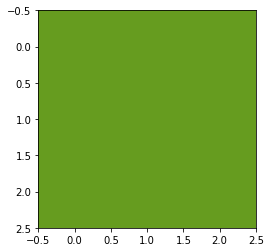

Grade? (0 to 5) 1
[0.41190828 0.08782961 0.73460879]


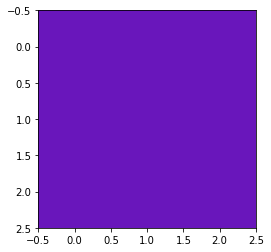

Grade? (0 to 5) 1
[0.162487  0.6491211 0.3984521]


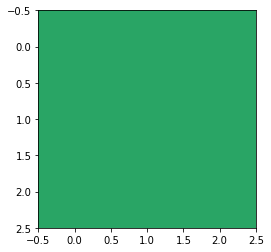

Grade? (0 to 5) 1
[0.64945819 0.43675459 0.86040853]


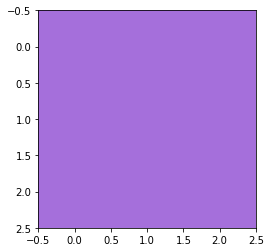

Grade? (0 to 5) 1
[0.17459834 0.76946657 0.73344237]


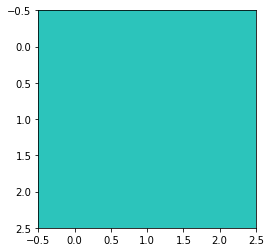

Grade? (0 to 5) 2
[0.27054602 0.39390834 0.75422346]


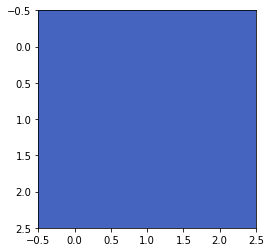

Grade? (0 to 5) 2
[0.21374515 0.73057417 0.73869203]


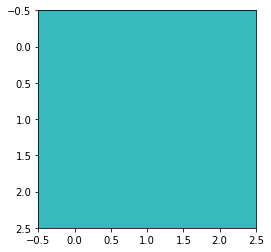

Grade? (0 to 5) 2
[0.72053283 0.4718703  0.70263493]


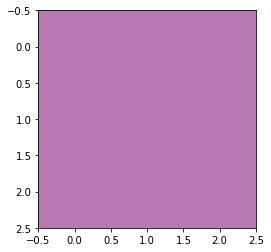

Grade? (0 to 5) 1


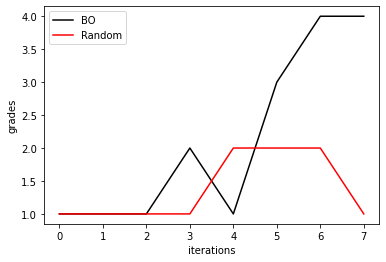

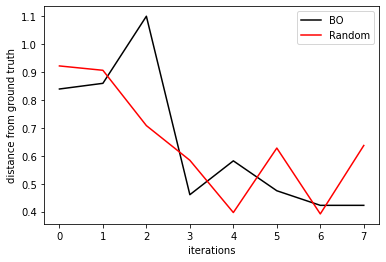

In [10]:
def f_u(x):
    plt.figure(1)
    print(x)
    im = x.reshape(1, 1, 3).repeat(3, axis=0).repeat(3, axis=1)
    plt.imshow(im)
    plt.show(block=False)
    while True:
        res = input('Grade? (0 to 5) ')
        if res in ['0', '1', '2', '3', '4', '5']:
            res = int(res)
            plt.close(1)
            return res


def run_bo(max_iter):
    bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0, 1)},
              {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)},
              {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)}]
    myBopt = GPyOpt.methods.BayesianOptimization(
        f=f_u, domain=bounds,
        acquisition_type='EI',
        exact_feval=False,
        eps=1e-6,
        normalize_Y=False,
        initial_design_numdata=2,
        maximize=True)
    myBopt.run_optimization(max_iter=max_iter - 2)
    myBopt.plot_acquisition()

    return myBopt


def run_random(max_iter):
    xs = np.zeros((max_iter, 3))
    ys = np.zeros((max_iter,))

    for i in range(max_iter):
        xs[i, :] = np.random.rand(3)

        ys[i] = f_u(xs[i, :])

    return xs, ys


if __name__ == "__main__":
    n_iter = 8
    # run BO
    bo = run_bo(n_iter)
    # run random for comparison
    ra = run_random(n_iter)

    bo_xs, bo_ys = bo.get_evaluations()
    ra_xs, ra_ys = ra

    # one can investigate these to see how good colors were found and compare
    # to a ground truth color

    plt.plot(-bo_ys, 'k-', label='BO')
    plt.plot(ra_ys, 'r-', label='Random')
    plt.xlabel('iterations')
    plt.ylabel('grades')
    plt.legend()
    plt.show()

    x_gt = np.array([0.42, 0.96, 0.98])

    plt.plot(np.sqrt(np.sum((bo_xs - x_gt)**2, 1)), 'k-', label='BO')
    plt.plot(np.sqrt(np.sum((ra_xs - x_gt)**2, 1)), 'r-', label='Random')
    plt.xlabel('iterations')
    plt.ylabel('distance from ground truth')
    plt.legend()
    plt.show()


Result:  
This time the BO performs better than before. The distance between final result and ground truth reduced to 0.42. The highest grade is 4.

2) change the acquisition function to LCB

[[0.75390701 0.14704039 0.15635615]]


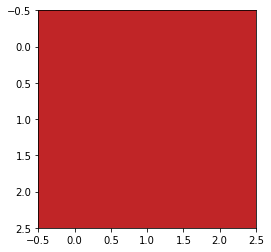

Grade? (0 to 5) 1
[[0.94142537 0.44913081 0.78881874]]


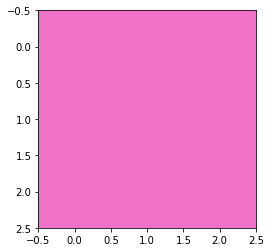

Grade? (0 to 5) 1
[[0.03520126 0.97916228 0.89392306]]


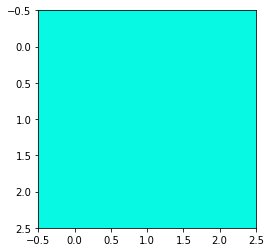

Grade? (0 to 5) 3
[[0. 1. 0.]]


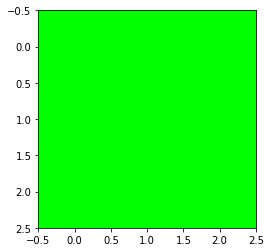

Grade? (0 to 5) 1
[[0.         0.29185487 1.        ]]


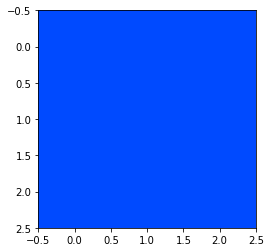

Grade? (0 to 5) 1
[[0.06094539 0.97705669 0.96173437]]


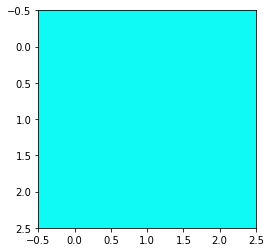

Grade? (0 to 5) 4
[[0.35953431 1.         1.        ]]


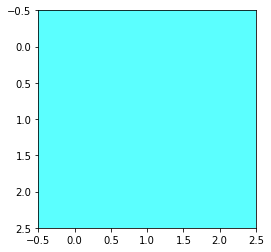

Grade? (0 to 5) 4
[[0.40800769 1.         1.        ]]


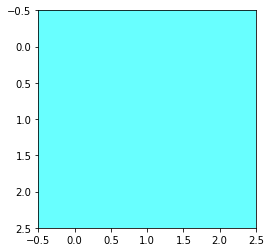

Grade? (0 to 5) 4
[0.7248045  0.53122443 0.51686789]


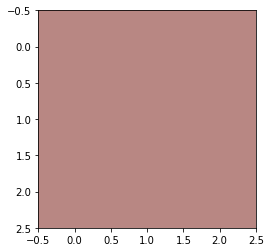

Grade? (0 to 5) 1
[0.37608446 0.08341825 0.36751596]


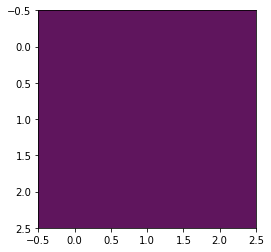

Grade? (0 to 5) 1
[0.84539949 0.0726815  0.16836974]


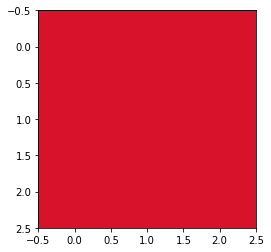

Grade? (0 to 5) 1
[0.87448522 0.81558522 0.84526562]


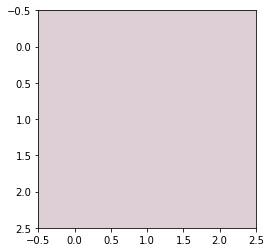

Grade? (0 to 5) 1
[0.27463164 0.85510041 0.7844498 ]


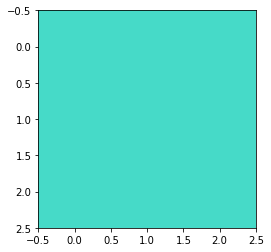

Grade? (0 to 5) 2
[0.10182495 0.76491971 0.60922297]


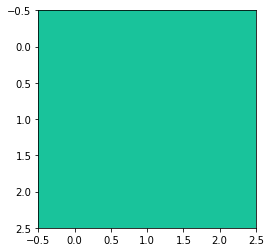

Grade? (0 to 5) 1
[0.53320932 0.72550056 0.32579846]


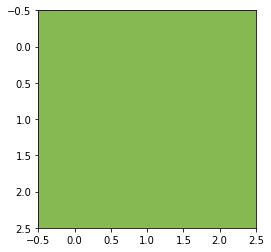

Grade? (0 to 5) 1
[0.74235762 0.65061277 0.88564795]


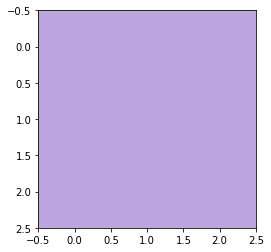

Grade? (0 to 5) 1


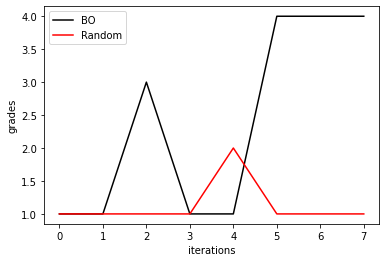

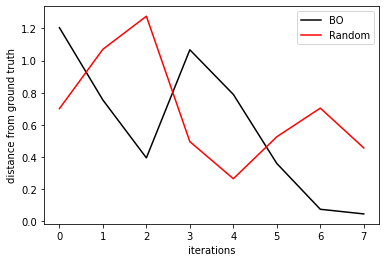

In [11]:
def f_u(x):
    plt.figure(1)
    print(x)
    im = x.reshape(1, 1, 3).repeat(3, axis=0).repeat(3, axis=1)
    plt.imshow(im)
    plt.show(block=False)
    while True:
        res = input('Grade? (0 to 5) ')
        if res in ['0', '1', '2', '3', '4', '5']:
            res = int(res)
            plt.close(1)
            return res


def run_bo(max_iter):
    bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0, 1)},
              {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)},
              {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)}]
    myBopt = GPyOpt.methods.BayesianOptimization(
        f=f_u, domain=bounds,
        acquisition_type='LCB',
        exact_feval=False,
        eps=1e-6,
        normalize_Y=False,
        initial_design_numdata=2,
        maximize=True)
    myBopt.run_optimization(max_iter=max_iter - 2)
    myBopt.plot_acquisition()

    return myBopt


def run_random(max_iter):
    xs = np.zeros((max_iter, 3))
    ys = np.zeros((max_iter,))

    for i in range(max_iter):
        xs[i, :] = np.random.rand(3)

        ys[i] = f_u(xs[i, :])

    return xs, ys


if __name__ == "__main__":
    n_iter = 8
    # run BO
    bo = run_bo(n_iter)
    # run random for comparison
    ra = run_random(n_iter)

    bo_xs, bo_ys = bo.get_evaluations()
    ra_xs, ra_ys = ra

    # one can investigate these to see how good colors were found and compare
    # to a ground truth color

    plt.plot(-bo_ys, 'k-', label='BO')
    plt.plot(ra_ys, 'r-', label='Random')
    plt.xlabel('iterations')
    plt.ylabel('grades')
    plt.legend()
    plt.show()

    x_gt = np.array([0.42, 0.96, 0.98])

    plt.plot(np.sqrt(np.sum((bo_xs - x_gt)**2, 1)), 'k-', label='BO')
    plt.plot(np.sqrt(np.sum((ra_xs - x_gt)**2, 1)), 'r-', label='Random')
    plt.xlabel('iterations')
    plt.ylabel('distance from ground truth')
    plt.legend()
    plt.show()


Now the optimization performs best. The final distance is less than 0.1. The highest grade is 4

#### 5. Discussion
During the three experiment process, I observed that sometimes the participant forgot what color he chose, especially the color is close to the ground truth. So he usually hesitated between 4 and 5. Another phenomenon is that in the first experiment, he didn't know the second round is using the Random method. When he saw the color was far away from the ground truth, he doubted that whether his grade was reasonable.  
Thus I think human-in-the-loop experiments sometimes will affect the optimization results. Users' subjective thinking is not always precise. If we use users' judgement as the result evaluation of the experiment, it's likely that there will be deviation. And the deviation will change according to the experience and knowledge of users. Another problem is that if users know that they are in an experiment, they might change their way of thinking and their actions will also be different from those in real life.  

**How to alleviate the possible problems and improve the system?**  
I think firstly, it's better to take users act in their real life rather than in laboratory. In their familiar situation, their action and way of thinking will be more real. In addition, considering the bias and uncertainty of user thinking, it is best to increase the number of trials and the number of participants.

#### 6. Application
1. Recommended system  
In movie, music, shopping website, we need to know users' preference so that to recommend relevant products to them. Firstly, the website will explore different kinds of products to show, when users interact with some of them, the weight of those products will increase. The system will record such change and adjust the presented products next time. If the system wants to find users' favorite products, the Bayesian Optimization could do it.  
2. Drug discover  
Using Bayesian Optimization, some substances with similar drug molecules will be discovered.
